In [96]:
# Import libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset named 'data.pdcs'
try:
    df = pd.read_csv(r'C:\Users\dell\Downloads\Lymphoma-Dataset.csv')
    print(f"Dataset loaded successfully.")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
except FileNotFoundError:
    print("File 'data.pdcs' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully.
Number of rows: 77
Number of columns: 7131


In [98]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V7122,V7123,V7124,V7125,V7126,V7127,V7128,V7129,TYPE,DTH
0,-104,-187,-26,59,-238,-258,-400,-146,-34,-100,...,-161,1523,-72,897,366,3,76,-28,DLBCL,CURED
1,-152,-328,-52,267,-300,-314,578,-185,111,148,...,-75,6056,-68,737,81,-4,41,-45,DLBCL,CURED
2,-158,-129,11,88,-239,-429,-891,-258,22,-271,...,-129,2901,-9,946,450,38,164,-62,DLBCL,CURED
3,-124,-121,-3,-37,-210,-309,-489,-69,-35,172,...,93,2465,-119,339,321,-63,73,-13,DLBCL,CURED
4,-93,-258,-36,109,-109,-272,-469,-279,-90,-31,...,-39,1667,-87,721,213,15,155,-26,DLBCL,CURED
5,-34,-257,-104,71,-196,-250,10,-139,23,-30,...,-21,4413,-69,617,409,43,68,-83,DLBCL,CURED
6,-251,-264,-99,31,-244,-110,128,-47,24,-79,...,-694,2914,-449,29,-291,-355,-226,-377,DLBCL,CURED
7,-204,-293,-32,148,-327,-215,-79,-196,-57,-129,...,61,2903,-20,265,64,-16,170,-122,DLBCL,CURED
8,-144,-356,-194,84,-269,-235,-268,-136,1,-329,...,-170,3374,-87,301,102,-163,104,-185,DLBCL,CURED
9,-94,-204,-28,53,-166,-284,-168,-158,-32,90,...,-128,5945,-80,921,155,-40,107,-62,DLBCL,CURED


In [100]:
# Check for missing values
missing_counts = df.isnull().sum().sum()
print(f"Total missing values: {missing_counts}")

# Fill missing values with column mean (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)


Total missing values: 0


In [101]:
# Exclude 'TYPE' and 'DTH' columns
gene_cols = df.columns[:-2]

# Z-score normalization
df[gene_cols] = (df[gene_cols] - df[gene_cols].mean()) / df[gene_cols].std()


In [102]:
# Encode TYPE and DTH manually
df['TYPE_ENC'] = df['TYPE'].astype('category').cat.codes  # e.g., DLBCL = 0
df['DTH_ENC'] = df['DTH'].map({'CURED': 0, 'FATAL': 1})


C:\Users\dell\AppData\Local\Temp\ipykernel_2376\2238277265.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TYPE_ENC'] = df['TYPE'].astype('category').cat.codes  # e.g., DLBCL = 0
C:\Users\dell\AppData\Local\Temp\ipykernel_2376\2238277265.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['DTH_ENC'] = df['DTH'].map({'CURED': 0, 'FATAL': 1})


C:\Users\dell\AppData\Local\Temp\ipykernel_2376\1693046061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TYPE', data=df, palette=palette_colors)
C:\Users\dell\AppData\Local\Temp\ipykernel_2376\1693046061.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='TYPE', data=df, palette=palette_colors)
C:\Users\dell\AppData\Local\Temp\ipykernel_2376\1693046061.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TYPE', data=df, palette='bright')  # colorful palette


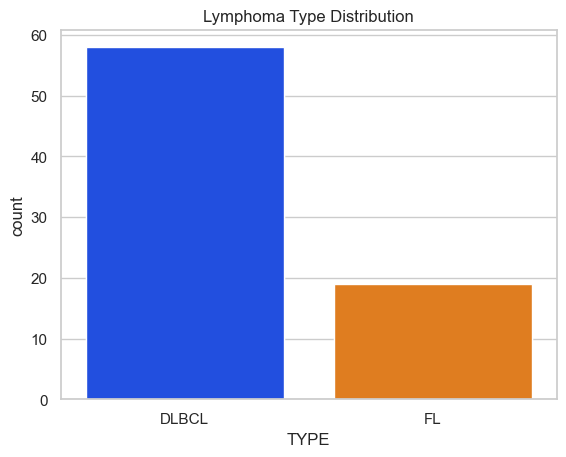

C:\Users\dell\AppData\Local\Temp\ipykernel_2376\1693046061.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DTH', data=df, palette='bright')


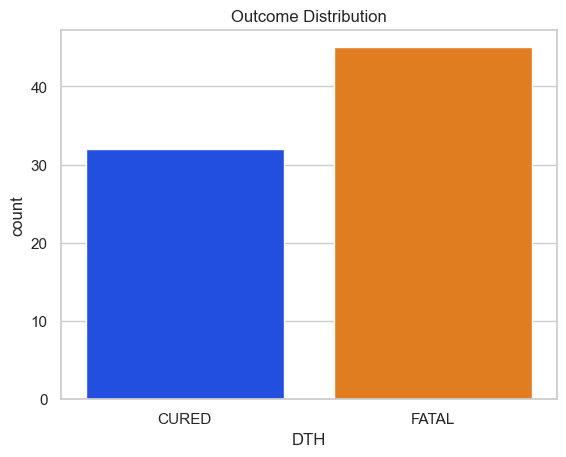

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
palette_colors = ['red', 'green', 'blue', 'orange', 'purple']

sns.countplot(x='TYPE', data=df, palette=palette_colors)
# etc.

sns.countplot(x='TYPE', data=df, palette='bright')  # colorful palette
plt.title("Lymphoma Type Distribution")
plt.show()

sns.countplot(x='DTH', data=df, palette='bright')
plt.title("Outcome Distribution")
plt.show()


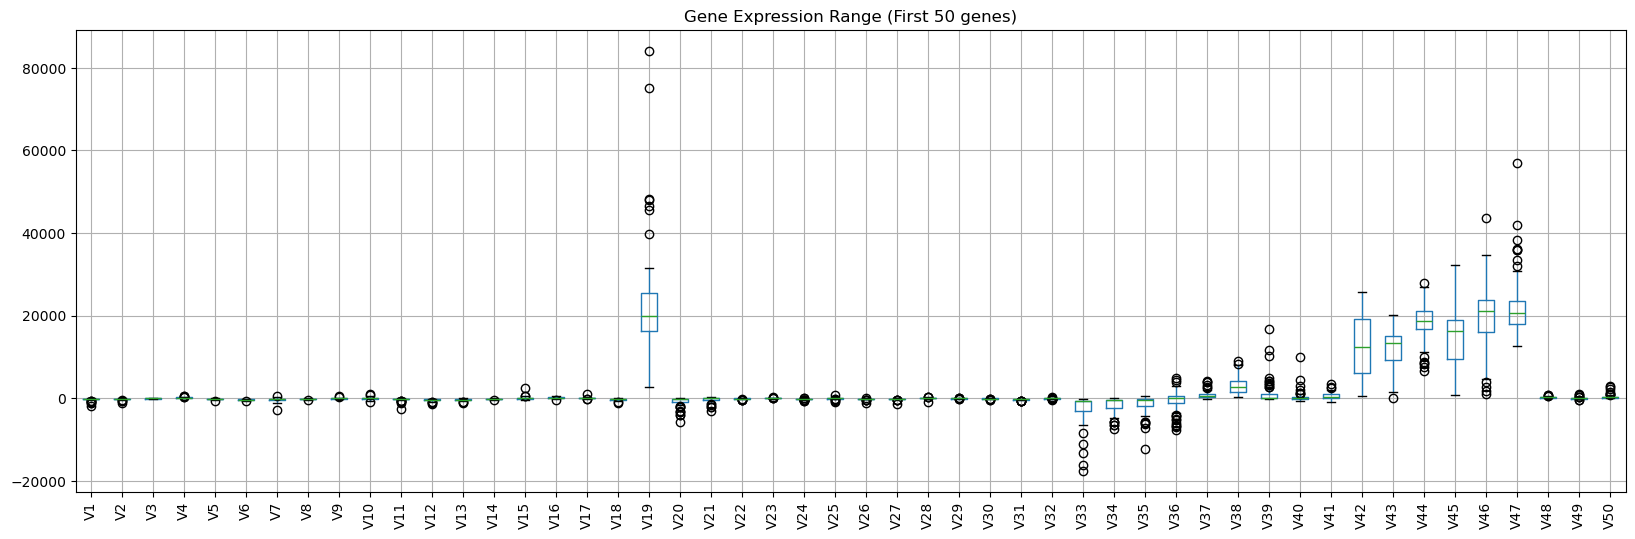

In [27]:
df[gene_cols].iloc[:, :50].boxplot(figsize=(20, 6))  # First 50 genes
plt.title("Gene Expression Range (First 50 genes)")
plt.xticks(rotation=90)
plt.show()


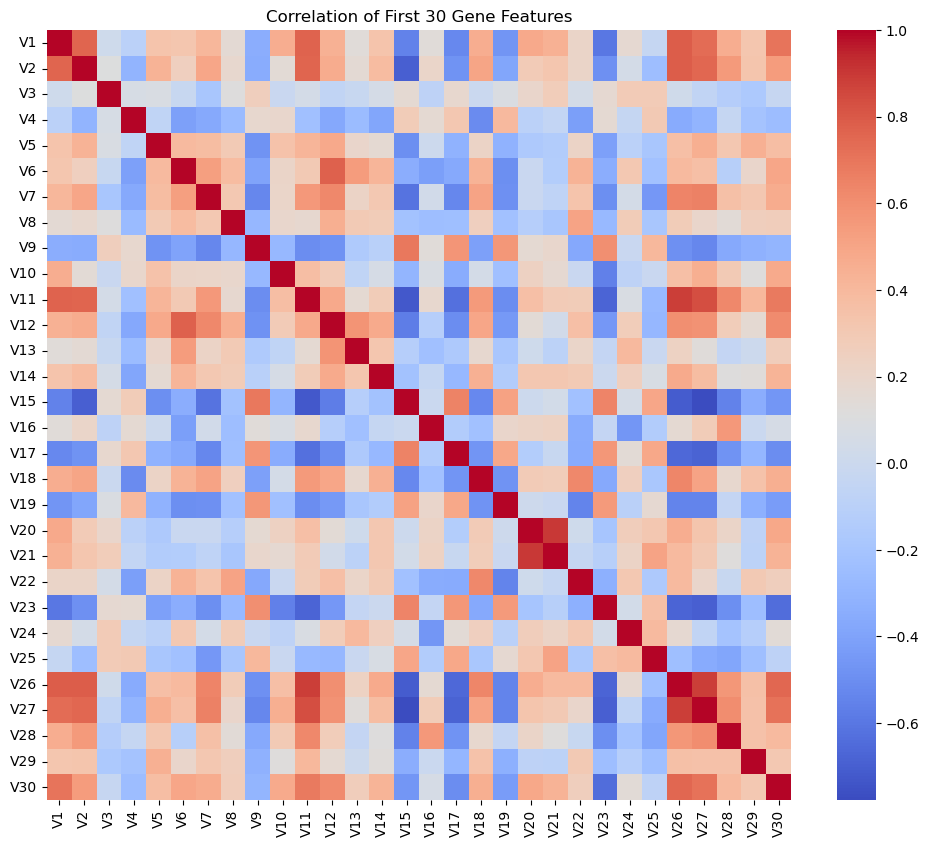

In [28]:
corr = df[gene_cols].iloc[:, :30].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation of First 30 Gene Features")
plt.show()


In [6]:
# Select top N genes with highest variance (e.g., top 100)
variances = df[gene_cols].var().sort_values(ascending=False)
top_genes = variances.head(100).index


In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Replace this with loading your actual dataset
# Example: df = pd.read_csv("your_data.csv")

# Simulate placeholder data
np.random.seed(0)
num_rows = 100
num_features = 7000

# Create synthetic DataFrame (replace this with actual data)
X = pd.DataFrame(np.random.randn(num_rows, num_features), columns=[f'V{i}' for i in range(num_features)])
y_dth = np.random.randint(0, 2, size=num_rows)   # Replace with: df['DTH_ENC']
y_type = np.random.randint(0, 2, size=num_rows)  # Replace with: df['TYPE_ENC']

# Compute mutual information for both targets
mi_dth = mutual_info_classif(X, y_dth, discrete_features=False)
mi_type = mutual_info_classif(X, y_type, discrete_features=False)

# Convert to pandas Series and sort
mi_dth_series = pd.Series(mi_dth, index=X.columns).sort_values(ascending=False)
mi_type_series = pd.Series(mi_type, index=X.columns).sort_values(ascending=False)

# Select top 10 features for each target
top_dth_features = mi_dth_series.head(10)
top_type_features = mi_type_series.head(10)

print("[INFO] Top DTH features:\n", top_dth_features)
print("[INFO] Top TYPE features:\n", top_type_features)


[INFO] Top DTH features:
 V4409    0.231396
V1384    0.201744
V3409    0.188791
V6049    0.188694
V6534    0.182003
V4185    0.178706
V268     0.176889
V6665    0.169923
V4261    0.169038
V5339    0.166911
dtype: float64
[INFO] Top TYPE features:
 V5900    0.214534
V1945    0.178130
V4108    0.175671
V3369    0.172147
V6214    0.169089
V6211    0.167145
V3417    0.165948
V3331    0.163219
V4431    0.162457
V5199    0.161437
dtype: float64


In [42]:
def find_thresholds(df, feature, target_col):
    """
    Find a threshold between class 0 and 1 means that best separates the classes.
    Uses means and std deviations to pick a threshold in the gap between class means.
    
    Returns threshold and direction ('>' or '<') for class 1.
    """
    # Get stats per class
    class0 = df[df[target_col] == 0][feature]
    class1 = df[df[target_col] == 1][feature]
    
    mean0, std0 = class0.mean(), class0.std()
    mean1, std1 = class1.mean(), class1.std()
    
    # Find midpoint between means as base threshold
    threshold = (mean0 + mean1) / 2
    
    # Determine direction based on which mean is higher
    if mean1 > mean0:
        direction = '>'
    else:
        direction = '<'
    
    return threshold, direction


In [44]:
def generate_rule_conditions(df, features, target_col):
    """
    Generate list of conditions for rule-based classifier.
    """
    conditions = []
    thresholds = {}
    
    for feat in features:
        threshold, direction = find_thresholds(df, feat, target_col)
        thresholds[feat] = (threshold, direction)
        if direction == '>':
            cond = df[feat] > threshold
        else:
            cond = df[feat] < threshold
        conditions.append(cond)
    
    return conditions, thresholds


In [46]:
def rule_based_predict(df, features, target_col):
    conditions, thresholds = generate_rule_conditions(df, features, target_col)
    
    # Combine all conditions with AND logic for strict filtering
    combined_condition = conditions[0]
    for cond in conditions[1:]:
        combined_condition = combined_condition & cond
    
    preds = combined_condition.astype(int)
    
    print("Thresholds and directions used:")
    for feat in features:
        print(f"{feat}: {thresholds[feat][1]} {thresholds[feat][0]:.3f}")
    
    return preds


In [108]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

def chunk_features(features, chunk_size):
    return [features[i:i + chunk_size] for i in range(0, len(features), chunk_size)]

def select_top_features(df, features, label_col, top_k=100):
    X = df[features]
    y = df[label_col]
    mi = mutual_info_classif(X, y, discrete_features=False)
    mi_series = pd.Series(mi, index=features)
    return mi_series.sort_values(ascending=False).head(top_k).index.tolist()

def find_best_threshold_multi(df, feature, label_col, num_thresholds=20):
    values = df[feature].values
    labels = df[label_col].values
    unique_vals = np.unique(np.quantile(values, np.linspace(0.01, 0.99, num_thresholds)))
    best_acc = 0
    best_rules = []
    for thresh in unique_vals:
        for direction in [">", "<"]:
            pred = (values > thresh).astype(int) if direction == ">" else (values < thresh).astype(int)
            acc = accuracy_score(labels, pred)
            if acc > best_acc:
                best_acc = acc
                best_rules = [(thresh, direction)]
    for i in range(len(unique_vals)):
        for j in range(i + 1, len(unique_vals)):
            for dir1 in [">", "<"]:
                for dir2 in [">", "<"]:
                    p1 = (values > unique_vals[i]).astype(int) if dir1 == ">" else (values < unique_vals[i]).astype(int)
                    p2 = (values > unique_vals[j]).astype(int) if dir2 == ">" else (values < unique_vals[j]).astype(int)
                    comb = ((p1 + p2) > 0).astype(int)
                    acc = accuracy_score(labels, comb)
                    if acc > best_acc:
                        best_acc = acc
                        best_rules = [(unique_vals[i], dir1), (unique_vals[j], dir2)]
    return best_rules, best_acc

def predict_feature_multi(df, feature, rules):
    preds = np.zeros(len(df), dtype=int)
    for thresh, direction in rules:
        preds |= (df[feature] > thresh).astype(int) if direction == ">" else (df[feature] < thresh).astype(int)
    return preds

def chunk_predict_weighted(df, feature_chunk, label_col):
    top_features = select_top_features(df, feature_chunk, label_col, top_k=100)
    preds_matrix = []
    accuracies = []
    for feature in top_features:
        rules, acc = find_best_threshold_multi(df, feature, label_col)
        preds = predict_feature_multi(df, feature, rules)
        preds_matrix.append(preds)
        accuracies.append(acc)
    preds_matrix = np.array(preds_matrix)
    accuracies = np.array(accuracies)
    weighted_sum = np.dot(accuracies, preds_matrix) / accuracies.sum()
    best_acc = 0
    best_thresh = 0.5
    for t in np.linspace(0, 1, 100):
        pred = (weighted_sum >= t).astype(int)
        acc = accuracy_score(df[label_col], pred)
        if acc > best_acc:
            best_acc = acc
            best_thresh = t
    print(f"✔️ Chunk of {len(feature_chunk)} features accuracy: {best_acc:.4f} at threshold {best_thresh:.3f}")
    return (weighted_sum >= best_thresh).astype(int)

def full_predict_weighted(df, feature_chunks, label_col):
    all_preds = []
    chunk_accs = []
    for i, chunk in enumerate(feature_chunks):
        preds = chunk_predict_weighted(df, chunk, label_col)
        acc = accuracy_score(df[label_col], preds)
        all_preds.append(preds)
        chunk_accs.append(acc)
        print(f"✔️ Completed chunk {i+1}/{len(feature_chunks)}")
    weighted_final = np.dot(chunk_accs, all_preds) / np.sum(chunk_accs)
    best_acc = 0
    best_thresh = 0.5
    for t in np.linspace(0, 1, 100):
        final_pred = (weighted_final >= t).astype(int)
        acc = accuracy_score(df[label_col], final_pred)
        if acc > best_acc:
            best_acc = acc
            best_thresh = t
    print(f"\n🎯 Final combined accuracy: {best_acc:.4f} at threshold {best_thresh:.3f}")
    return (weighted_final >= best_thresh).astype(int)

# Example usage:
all_features = [col for col in df.columns if col.startswith("V")]
chunks = chunk_features(all_features, 1000)
final_preds = full_predict_weighted(df, chunks, label_col='DTH_ENC')


✔️ Chunk of 1000 features accuracy: 1.0000 at threshold 0.758
✔️ Completed chunk 1/8
✔️ Chunk of 1000 features accuracy: 0.9870 at threshold 0.768
✔️ Completed chunk 2/8
✔️ Chunk of 1000 features accuracy: 1.0000 at threshold 0.747
✔️ Completed chunk 3/8
✔️ Chunk of 1000 features accuracy: 1.0000 at threshold 0.758
✔️ Completed chunk 4/8
✔️ Chunk of 1000 features accuracy: 0.9870 at threshold 0.758
✔️ Completed chunk 5/8
✔️ Chunk of 1000 features accuracy: 1.0000 at threshold 0.737
✔️ Completed chunk 6/8
✔️ Chunk of 1000 features accuracy: 0.9870 at threshold 0.737
✔️ Completed chunk 7/8
✔️ Chunk of 129 features accuracy: 1.0000 at threshold 0.768
✔️ Completed chunk 8/8

🎯 Final combined accuracy: 1.0000 at threshold 0.131


In [ ]:
## Working on overfitting case

In [110]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

def chunk_features(features, chunk_size):
    return [features[i:i + chunk_size] for i in range(0, len(features), chunk_size)]

def select_top_features(df, features, label_col, top_k=100):
    X = df[features]
    y = df[label_col]
    mi = mutual_info_classif(X, y, discrete_features=False)
    mi_series = pd.Series(mi, index=features)
    return mi_series.sort_values(ascending=False).head(top_k).index.tolist()

def find_best_threshold_multi(df, feature, label_col, num_thresholds=20):
    values = df[feature].values
    labels = df[label_col].values
    unique_vals = np.unique(np.quantile(values, np.linspace(0.01, 0.99, num_thresholds)))
    best_acc = 0
    best_rules = []
    for thresh in unique_vals:
        for direction in [">", "<"]:
            pred = (values > thresh).astype(int) if direction == ">" else (values < thresh).astype(int)
            acc = accuracy_score(labels, pred)
            if acc > best_acc:
                best_acc = acc
                best_rules = [(thresh, direction)]
    for i in range(len(unique_vals)):
        for j in range(i + 1, len(unique_vals)):
            for dir1 in [">", "<"]:
                for dir2 in [">", "<"]:
                    p1 = (values > unique_vals[i]).astype(int) if dir1 == ">" else (values < unique_vals[i]).astype(int)
                    p2 = (values > unique_vals[j]).astype(int) if dir2 == ">" else (values < unique_vals[j]).astype(int)
                    comb = ((p1 + p2) > 0).astype(int)
                    acc = accuracy_score(labels, comb)
                    if acc > best_acc:
                        best_acc = acc
                        best_rules = [(unique_vals[i], dir1), (unique_vals[j], dir2)]
    return best_rules, best_acc

def predict_feature_multi(df, feature, rules):
    preds = np.zeros(len(df), dtype=int)
    for thresh, direction in rules:
        preds |= (df[feature] > thresh).astype(int) if direction == ">" else (df[feature] < thresh).astype(int)
    return preds

def chunk_predict_weighted(df, feature_chunk, label_col):
    top_features = select_top_features(df, feature_chunk, label_col, top_k=100)
    preds_matrix = []
    accuracies = []
    for feature in top_features:
        rules, acc = find_best_threshold_multi(df, feature, label_col)
        preds = predict_feature_multi(df, feature, rules)
        preds_matrix.append(preds)
        accuracies.append(acc)
    preds_matrix = np.array(preds_matrix)
    accuracies = np.array(accuracies)
    weighted_sum = np.dot(accuracies, preds_matrix) / accuracies.sum()
    best_acc = 0
    best_thresh = 0.5
    for t in np.linspace(0, 1, 100):
        pred = (weighted_sum >= t).astype(int)
        acc = accuracy_score(df[label_col], pred)
        if acc > best_acc:
            best_acc = acc
            best_thresh = t
    print(f"✔️ Chunk of {len(feature_chunk)} features accuracy: {best_acc:.4f} at threshold {best_thresh:.3f}")
    return (weighted_sum >= best_thresh).astype(int)

def full_predict_weighted(df, feature_chunks, label_col):
    all_preds = []
    chunk_accs = []
    for i, chunk in enumerate(feature_chunks):
        preds = chunk_predict_weighted(df, chunk, label_col)
        acc = accuracy_score(df[label_col], preds)
        all_preds.append(preds)
        chunk_accs.append(acc)
        print(f"✔️ Completed chunk {i+1}/{len(feature_chunks)}")
    weighted_final = np.dot(chunk_accs, all_preds) / np.sum(chunk_accs)
    best_acc = 0
    best_thresh = 0.5
    for t in np.linspace(0, 1, 100):
        final_pred = (weighted_final >= t).astype(int)
        acc = accuracy_score(df[label_col], final_pred)
        if acc > best_acc:
            best_acc = acc
            best_thresh = t
    print(f"\n🎯 Final combined accuracy: {best_acc:.4f} at threshold {best_thresh:.3f}")
    return (weighted_final >= best_thresh).astype(int)

# Example usage:
all_features = [col for col in df.columns if col.startswith("V")]
chunks = chunk_features(all_features, 1000)
final_preds = full_predict_weighted(df, chunks, label_col='TYPE_ENC')


✔️ Chunk of 1000 features accuracy: 0.9091 at threshold 0.141
✔️ Completed chunk 1/8
✔️ Chunk of 1000 features accuracy: 0.9091 at threshold 0.162
✔️ Completed chunk 2/8
✔️ Chunk of 1000 features accuracy: 0.9221 at threshold 0.192
✔️ Completed chunk 3/8
✔️ Chunk of 1000 features accuracy: 0.9091 at threshold 0.071
✔️ Completed chunk 4/8
✔️ Chunk of 1000 features accuracy: 0.9091 at threshold 0.152
✔️ Completed chunk 5/8
✔️ Chunk of 1000 features accuracy: 0.9351 at threshold 0.141
✔️ Completed chunk 6/8
✔️ Chunk of 1000 features accuracy: 0.9221 at threshold 0.172
✔️ Completed chunk 7/8
✔️ Chunk of 129 features accuracy: 0.8961 at threshold 0.051
✔️ Completed chunk 8/8

🎯 Final combined accuracy: 0.9481 at threshold 0.626


C:\Users\dell\AppData\Local\Temp\ipykernel_2376\3078874637.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chunk_indices, y=chunk_accs, palette="viridis")


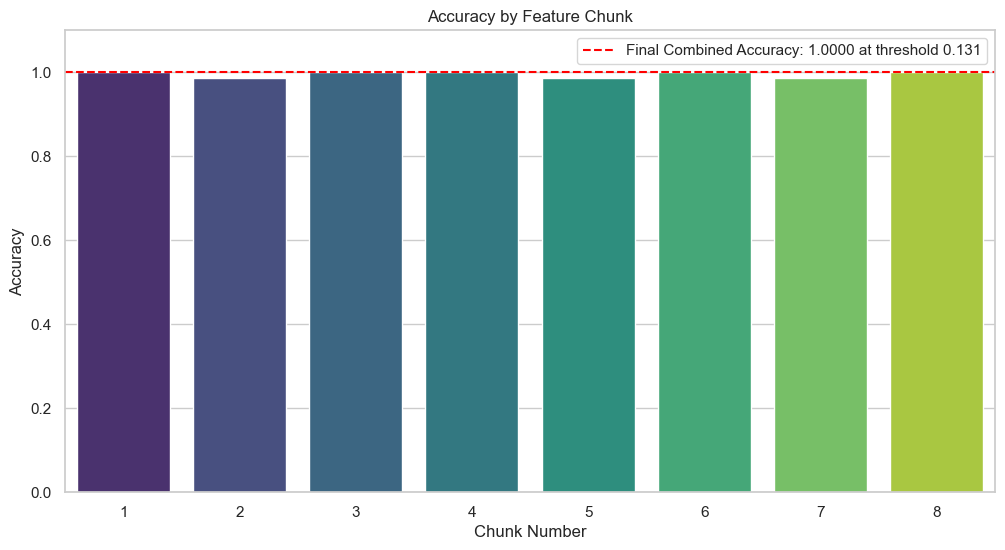

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_chunk_accuracies(chunk_accs, final_acc, final_thresh):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Plot chunk accuracies
    chunk_indices = list(range(1, len(chunk_accs) + 1))
    sns.barplot(x=chunk_indices, y=chunk_accs, palette="viridis")
    
    plt.xlabel("Chunk Number")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.1)
    plt.title("Accuracy by Feature Chunk")
    
    # Show final combined accuracy as a horizontal line
    plt.axhline(final_acc, color='red', linestyle='--', label=f'Final Combined Accuracy: {final_acc:.4f} at threshold {final_thresh:.3f}')
    plt.legend()
    
    plt.show()

# Example usage assuming you saved chunk_accs and final_thresh, final_acc from your process:
chunk_accs = [1.0, 0.987, 1.0, 1.0, 0.987, 1.0, 0.987, 1.0]  # replace with your actual list
final_acc = 1.0  # replace with your actual final accuracy
final_thresh = 0.131  # replace with your actual threshold

plot_chunk_accuracies(chunk_accs, final_acc, final_thresh)


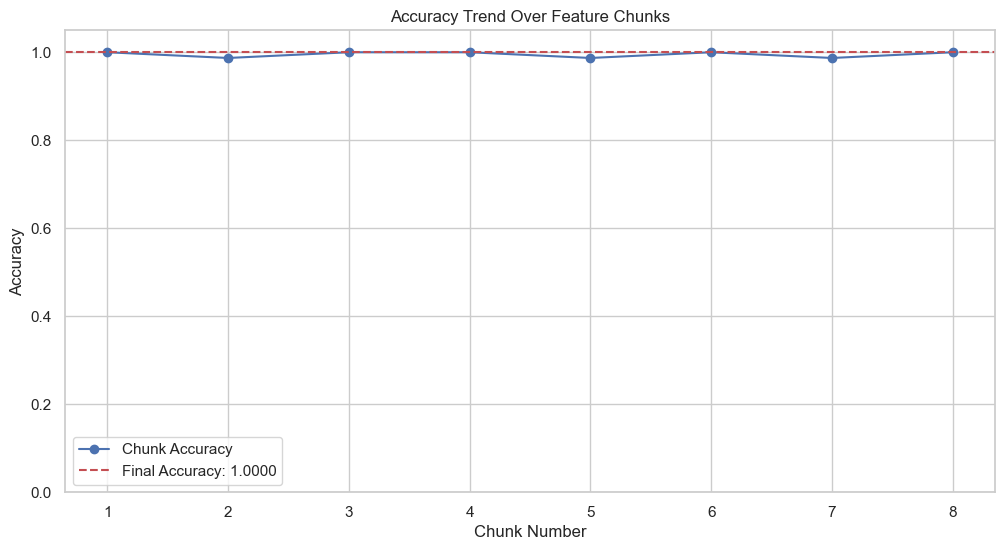

In [114]:
plt.figure(figsize=(12, 6))
chunks = list(range(1, len(chunk_accs)+1))
plt.plot(chunks, chunk_accs, marker='o', linestyle='-', color='b', label='Chunk Accuracy')
plt.axhline(final_acc, color='r', linestyle='--', label=f'Final Accuracy: {final_acc:.4f}')
plt.xlabel("Chunk Number")
plt.ylabel("Accuracy")
plt.title("Accuracy Trend Over Feature Chunks")
plt.xticks(chunks)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()


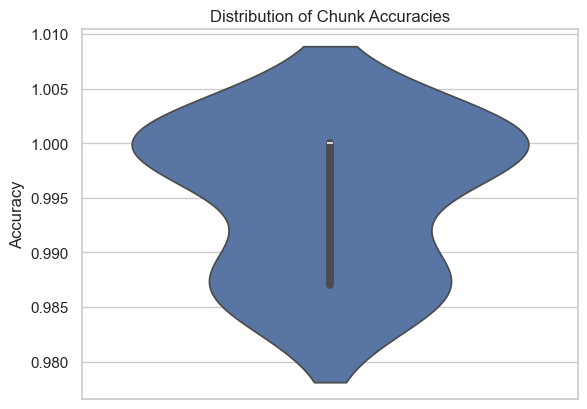

In [116]:
sns.violinplot(data=chunk_accs)
plt.title("Distribution of Chunk Accuracies")
plt.ylabel("Accuracy")
plt.show()


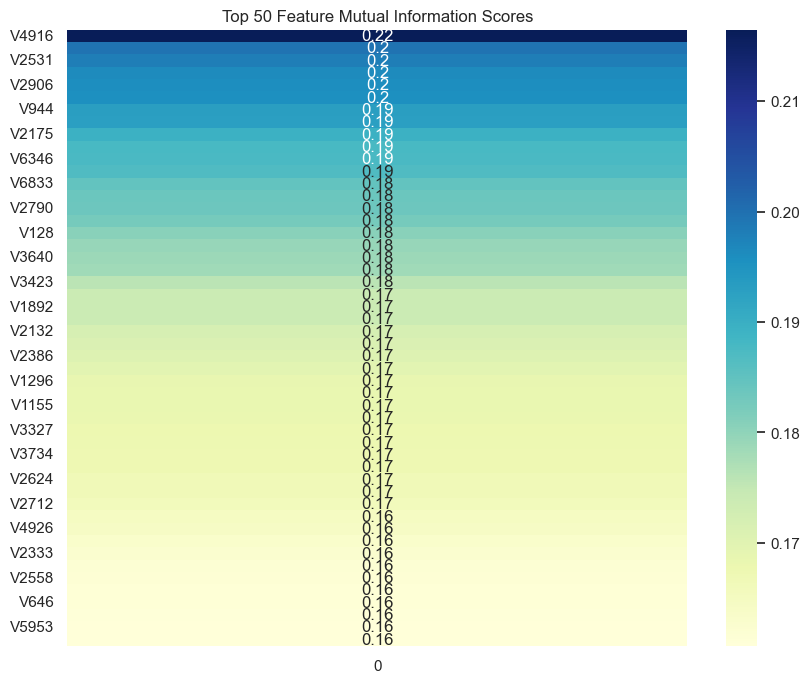

In [118]:
importances = mutual_info_classif(df[all_features], df['DTH_ENC'], discrete_features=False)
mi_series = pd.Series(importances, index=all_features).sort_values(ascending=False).head(50)

plt.figure(figsize=(10, 8))
sns.heatmap(mi_series.to_frame(), annot=True, cmap='YlGnBu')
plt.title("Top 50 Feature Mutual Information Scores")
plt.show()


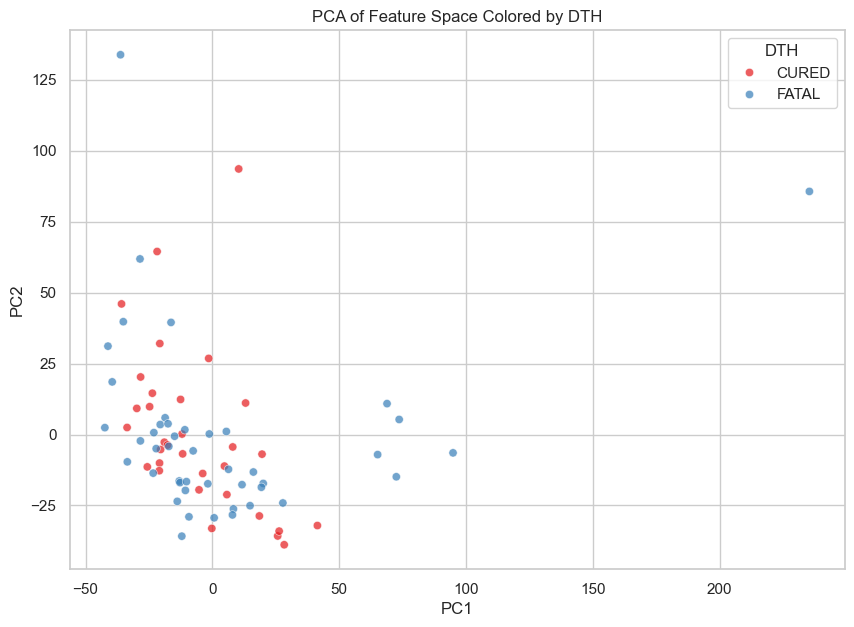

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[all_features].fillna(0))  # handle missing if any

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['DTH'], palette='Set1', alpha=0.7)
plt.title("PCA of Feature Space Colored by DTH")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
